In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  # visualization
import seaborn as sns # visualization
%matplotlib inline
%whos

Variable                Type                        Data/Info
-------------------------------------------------------------
CO2_col                 DataFrame                           Country   YEA Pow<...>\n[2674 rows x 6 columns]
GDP_CO2                 DataFrame                         COU    Country     <...>n[2674 rows x 15 columns]
GDP_CO2_df              DataFrame                          COU    Country    <...>[10304 rows x 15 columns]
GDPandCO2               DataFrame                          Country   YEA     <...>\n[886 rows x 10 columns]
LinearRegression        ABCMeta                     <class 'sklearn.linear_mo<...>l.base.LinearRegression'>
StandardScaler          type                        <class 'sklearn.preproces<...>ing.data.StandardScaler'>
X                       DataFrame                         GDP_STD  CO2 GDP_ST<...>n\n[236 rows x 3 columns]
X2                      DataFrame                        const   GDP_STD  CO2<...>n\n[236 rows x 4 columns]
X_test      

In [64]:
GDP_CO2_df = pd.read_csv("GDP_CO2.csv")
productGDP_df = pd.read_csv("gross_domestic_product.csv")
multifactor_PG_df = pd.read_csv("multifactor_PG.csv")
forest_df = pd.read_csv("FOREST_05122019094850577.csv")


In [65]:
forest_df.Variable.value_counts()

Fellings                                549
Gross Increment                         378
Intensity of use of forest resources    375
Net fellings                            263
Natural losses                          230
Net Increment                           198
Net change                              180
Volumes salvaged                        162
Name: Variable, dtype: int64

In [66]:
forest =forest_df.loc[(forest_df.Variable == 'Fellings')]
forest.drop(['Year', 'COU','Reference Period Code','Reference Period','Flag Codes','Flags'], axis=1,inplace = True) #not needed columns.
forest

C:\Users\boork\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,VAR,Variable,Country,YEA,Unit Code,Unit,PowerCode Code,PowerCode,Value
0,FELL_TOT,Fellings,Australia,1990,M3,Cubic metres,3,Thousands,17564.000
1,FELL_TOT,Fellings,Australia,1995,M3,Cubic metres,3,Thousands,19560.000
2,FELL_TOT,Fellings,Australia,2000,M3,Cubic metres,3,Thousands,24407.727
3,FELL_TOT,Fellings,Australia,2001,M3,Cubic metres,3,Thousands,24474.000
4,FELL_TOT,Fellings,Australia,2002,M3,Cubic metres,3,Thousands,24296.000
...,...,...,...,...,...,...,...,...,...
2245,FELL_TOT,Fellings,Lithuania,2013,M3,Cubic metres,3,Thousands,8600.000
2246,FELL_TOT,Fellings,Lithuania,2014,M3,Cubic metres,3,Thousands,9180.000
2247,FELL_TOT,Fellings,Lithuania,2015,M3,Cubic metres,3,Thousands,9550.000
2248,FELL_TOT,Fellings,Lithuania,2016,M3,Cubic metres,3,Thousands,10350.000


# CO2 productivity

## Production-based CO2 productivity is calculated as real GDP generated per unit of CO2 emitted (USD/kg). Included are CO2 emissions from combustion of coal, oil, natural gas and other fuels.

# Multifactor productivity

## Multifactor productivity (MFP) reflects the overall efficiency with which labour and capital inputs are used together in the production process. Changes in MFP reflect the effects of changes in management practices, brand names, organizational change, general knowledge, network effects, spillovers from production factors, adjustment costs, economies of scale, the effects of imperfect competition and measurement errors. Growth in MFP is measured as a residual, i.e. that part of GDP growth that cannot be explained by changes in labour and capital inputs. In simple terms therefore, if labour and capital inputs remained unchanged between two periods, any changes in output would reflect changes in MFP. This indicator is measured as an index and in annual growth rates.



In [67]:
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'G7'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'G20'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'BRIICS economies - Brazil, Russia, India, Indonesia, China and South Africa'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'Euro area (19 countries)'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'European Union (28 countries)'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'OECD - Europe'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'OECD - Total'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'OECD America'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'OECD Asia Oceania'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'Eastern Europe, Caucasus and Central Asia'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'World'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'ASEAN'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'Latin America and Caribbean'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'Middle East and North Africa'].index , inplace = True)
multifactor = multifactor_PG_df.loc[multifactor_PG_df['VAR'] == 'EAMFP_EAMFPG']
multifactor.shape

(744, 15)

In [68]:
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'G7'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'G20'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'BRIICS economies - Brazil, Russia, India, Indonesia, China and South Africa'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'Euro area (19 countries)'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'European Union (28 countries)'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'OECD - Europe'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'OECD - Total'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'OECD America'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'OECD Asia Oceania'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'Eastern Europe, Caucasus and Central Asia'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'World'].index , inplace = True)
GDP_CO2 =GDP_CO2_df.loc[(GDP_CO2_df.VAR == 'CO2_PBPROD')]
GDP_CO2.shape

(2674, 15)

In [69]:
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'G7'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'BRIICS economies - Brazil, Russia, India, Indonesia, China and South Africa'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'Euro area (19 countries)'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'European Union (28 countries)'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'OECD - Total'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'Eastern Europe, Caucasus and Central Asia'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'G20'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'OECD - Europe'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'OECD America'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'OECD Asia Oceania'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'World'].index , inplace = True)
productGDP=productGDP_df.loc[(productGDP_df['SUBJECT'] == 'T_GDP')&(productGDP_df.Unit == 'US Dollar')& (productGDP_df.MEASURE =='VPVOB')]
productGDP.shape

(1813, 17)

In [70]:
CO2_col = GDP_CO2[['Country','YEA','PowerCode','Unit','Value','Variable',]]
productGDP_col = productGDP[['Country','TIME','Unit','Value','PowerCode','Subject']]
multifactor_col = multifactor[['Country','YEA','Unit','Value','PowerCode','Variable']]

In [71]:
productGDP_col.rename(columns ={'TIME' : 'YEA'}, inplace=True )
GDPandCO2 = pd.merge(productGDP_col, CO2_col, on=['Country','YEA'], how='inner')
test = pd.merge(GDPandCO2, multifactor_col, on=['Country','YEA'], how='inner')
test.rename(columns ={'Value_x' : 'GDP'}, inplace=True )
test.rename(columns ={'Value_y' : 'CO2 GDP'}, inplace=True )
test.rename(columns ={'Value' : 'multifactor'}, inplace=True )
test

C:\Users\boork\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Country,YEA,Unit_x,GDP,PowerCode_x,Subject,PowerCode_y,Unit_y,CO2 GDP,Variable_x,Unit,multifactor,PowerCode,Variable_y
0,Australia,1995,US Dollar,574401.6402,Millions,Gross Domestic Product (GDP); millions,Units,Number,2.013156,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.040453,Units,Environmentally adjusted multifactor productiv...
1,Australia,2000,US Dollar,695179.4993,Millions,Gross Domestic Product (GDP); millions,Units,Number,2.077365,"Production-based CO2 productivity, GDP per uni...",Percentage points,0.962618,Units,Environmentally adjusted multifactor productiv...
2,Australia,2001,US Dollar,722996.6281,Millions,Gross Domestic Product (GDP); millions,Units,Number,2.120337,"Production-based CO2 productivity, GDP per uni...",Percentage points,3.157764,Units,Environmentally adjusted multifactor productiv...
3,Australia,2002,US Dollar,744585.0171,Millions,Gross Domestic Product (GDP); millions,Units,Number,2.133708,"Production-based CO2 productivity, GDP per uni...",Percentage points,1.390201,Units,Environmentally adjusted multifactor productiv...
4,Australia,2003,US Dollar,774781.6857,Millions,Gross Domestic Product (GDP); millions,Units,Number,2.226577,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.696690,Units,Environmentally adjusted multifactor productiv...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,Lithuania,2009,US Dollar,61222.6963,Millions,Gross Domestic Product (GDP); millions,Units,Number,5.367111,"Production-based CO2 productivity, GDP per uni...",Percentage points,-9.279573,Units,Environmentally adjusted multifactor productiv...
623,Lithuania,2010,US Dollar,62226.6379,Millions,Gross Domestic Product (GDP); millions,Units,Number,5.052909,"Production-based CO2 productivity, GDP per uni...",Percentage points,6.739208,Units,Environmentally adjusted multifactor productiv...
624,Lithuania,2011,US Dollar,65987.0750,Millions,Gross Domestic Product (GDP); millions,Units,Number,5.725554,"Production-based CO2 productivity, GDP per uni...",Percentage points,6.462632,Units,Environmentally adjusted multifactor productiv...
625,Lithuania,2012,US Dollar,68512.3701,Millions,Gross Domestic Product (GDP); millions,Units,Number,5.941576,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.493612,Units,Environmentally adjusted multifactor productiv...


In [72]:
test = pd.merge(test, forest, on=['Country','YEA'], how='inner')

# Forest resources


## This indicator refers to the intensity of use of forest resources (timber). This indicator relates actual harvest or tree fellings to annual productive capacity of forests. Annual productive capacity is either a calculated value, such as an annual allowable cut, or an estimate of annual growth for existing stock. National averages may conceal important variations among forests. Tree fellings are defined as the average annual standing volume of all trees, living or dead, measured over bark (with no minimum diameter) that are cut during the reference period, including the volume of trees or parts of trees that are not removed from forested land, other wooded land and other felling sites. It includes silvicultural and pre-commercial thinnings and cleanings left in the forest, and natural losses that are not recovered. It is measured in thousands of cubic metres. Gross increase corresponds to the average annual volume of increment of all trees over the reference period of all trees, measured to a minimum diameter breast height (d.b.h) of 0 cm. It includes the increment on trees which have been felled or die during the reference period. It is also measured in thousands of cubic metres.



In [73]:
test.drop(['PowerCode_x','PowerCode_y'], axis=1,inplace = True) #not needed columns.
test

,Country,YEA,Unit_x,GDP,Subject,Unit_y,CO2 GDP,Variable_x,Unit_x,multifactor,Variable_y,VAR,Variable,Unit Code,Unit_y,PowerCode Code,Value
0,Australia,1995,US Dollar,574401.6402,Gross Domestic Product (GDP); millions,Number,2.013156,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.040453,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,19560.000
1,Australia,2000,US Dollar,695179.4993,Gross Domestic Product (GDP); millions,Number,2.077365,"Production-based CO2 productivity, GDP per uni...",Percentage points,0.962618,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,24407.727
2,Australia,2001,US Dollar,722996.6281,Gross Domestic Product (GDP); millions,Number,2.120337,"Production-based CO2 productivity, GDP per uni...",Percentage points,3.157764,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,24474.000
3,Australia,2002,US Dollar,744585.0171,Gross Domestic Product (GDP); millions,Number,2.133708,"Production-based CO2 productivity, GDP per uni...",Percentage points,1.390201,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,24296.000
4,Australia,2003,US Dollar,774781.6857,Gross Domestic Product (GDP); millions,Number,2.226577,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.696690,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,25819.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Lithuania,2009,US Dollar,61222.6963,Gross Domestic Product (GDP); millions,Number,5.367111,"Production-based CO2 productivity, GDP per uni...",Percentage points,-9.279573,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,9250.000
336,Lithuania,2010,US Dollar,62226.6379,Gross Domestic Product (GDP); millions,Number,5.052909,"Production-based CO2 productivity, GDP per uni...",Percentage points,6.739208,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,8640.000
337,Lithuania,2011,US Dollar,65987.0750,Gross Domestic Product (GDP); millions,Number,5.725554,"Production-based CO2 productivity, GDP per uni...",Percentage points,6.462632,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,8430.000
338,Lithuania,2012,US Dollar,68512.3701,Gross Domestic Product (GDP); millions,Number,5.941576,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.493612,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,8530.000


In [74]:
df = test[['GDP','CO2 GDP','multifactor','Value']]
df

,GDP,CO2 GDP,multifactor,Value
0,574401.6402,2.013156,2.040453,19560.000
1,695179.4993,2.077365,0.962618,24407.727
2,722996.6281,2.120337,3.157764,24474.000
3,744585.0171,2.133708,1.390201,24296.000
4,774781.6857,2.226577,2.696690,25819.000
...,...,...,...,...
335,61222.6963,5.367111,-9.279573,9250.000
336,62226.6379,5.052909,6.739208,8640.000
337,65987.0750,5.725554,6.462632,8430.000
338,68512.3701,5.941576,2.493612,8530.000


In [75]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
def standardNormalization(data):
    standardized = (data-data.mean())/data.std()
    return pd.Series(standardized)

In [76]:
x = df.GDP
z = df['CO2 GDP']
u = df.multifactor
x= standardNormalization(x)
u= standardNormalization(u)
z = standardNormalization(z)
d = {'GDP_STD': x, 'CO2 GDP_STD': z,'multifactor_STD':u,'fellings':test.Value}
df = pd.DataFrame(data=d)
df

,GDP_STD,CO2 GDP_STD,multifactor_STD,fellings
0,-0.242056,-1.187044,0.253420,19560.000
1,-0.128582,-1.148175,-0.172644,24407.727
2,-0.102447,-1.122163,0.695089,24474.000
3,-0.082164,-1.114069,-0.003622,24296.000
4,-0.053793,-1.057851,0.512828,25819.000
...,...,...,...,...
335,-0.724201,0.843241,-4.221345,9250.000
336,-0.723258,0.653042,2.110821,8640.000
337,-0.719725,1.060221,2.001492,8430.000
338,-0.717352,1.190988,0.432552,8530.000


In [77]:
df.corr().style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,GDP_STD,CO2 GDP_STD,multifactor_STD,fellings
GDP_STD,1.0,-0.072,-0.0088,0.44
CO2 GDP_STD,-0.072,1.0,-0.16,-0.15
multifactor_STD,-0.0088,-0.16,1.0,0.032
fellings,0.44,-0.15,0.032,1.0


In [78]:
X = df[['GDP_STD','CO2 GDP_STD','multifactor_STD']]
y = df.fellings
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1234)

In [79]:
diabetes = datasets.load_diabetes()

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
p_values = est2.summary2()
p_values

C:\Users\boork\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.198     
Dependent Variable:   fellings           AIC:                  8146.3760 
Date:                 2020-01-28 21:26   BIC:                  8161.6917 
No. Observations:     340                Log-Likelihood:       -4069.2   
Df Model:             3                  F-statistic:          28.81     
Df Residuals:         336                Prob (F-statistic):   1.33e-16  
R-squared:            0.205              Scale:                1.4727e+09
-------------------------------------------------------------------------
                  Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------------
const           30905.3532 2081.2123 14.8497 0.0000 26811.5059 34999.2006
GDP_STD         18296.3059 2090.1931  8.7534 0.0000 14184.7928 22407.8190
CO2 GDP_STD     -5084.9984 2116.7765 -2.4022 0.0168 -9248.8023  -921.1945
multifactor_STD   710.6956 2111.3157  0.3366 0.7366 -3442.3667  4863.7580
-------------------------------------------------------------------------
Omnibus:                158.323         Durbin-Watson:            0.177  
Prob(Omnibus):          0.000           Jarque-Bera (JB):         630.096
Skew:                   2.069           Prob(JB):                 0.000  
Kurtosis:               8.231           Condition No.:            1      
=========================================================================

"""

Text(0.5, 0.98, 'GDP vs fellings ')

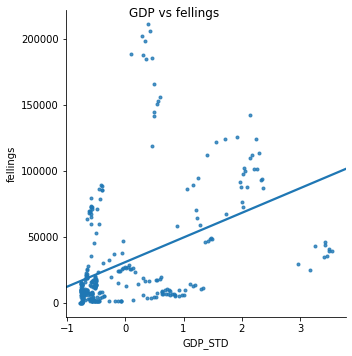

In [80]:
sns.lmplot(x='GDP_STD',y='fellings', ci= None, data=df, markers='.')
plt.gcf().suptitle('GDP vs fellings ')


Text(0.5, 0.98, 'CO2 GDP vs fellings ')

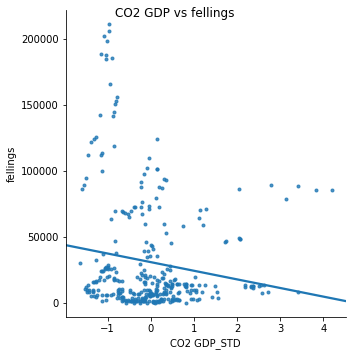

In [81]:
sns.lmplot(x='CO2 GDP_STD',y='fellings', ci= None, data=df, markers='.')
plt.gcf().suptitle('CO2 GDP vs fellings ')


Text(0.5, 0.98, 'multifactor vs fellings ')

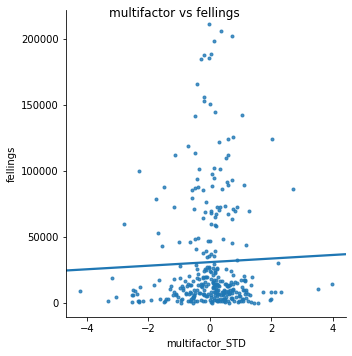

In [82]:
sns.lmplot(x='multifactor_STD',y='fellings', ci= None, data=df, markers='.')
plt.gcf().suptitle('multifactor vs fellings ')


In [83]:
df.fellings.describe()

count       340.000000
mean      30905.353224
std       42838.612990
min           0.200000
25%        5945.393750
50%       12862.500000
75%       35811.010000
max      210871.000000
Name: fellings, dtype: float64

# all the top values are from Canada

In [84]:
test.loc[test.Value>150000]

,Country,YEA,Unit_x,GDP,Subject,Unit_y,CO2 GDP,Variable_x,Unit_x,multifactor,Variable_y,VAR,Variable,Unit Code,Unit_y,PowerCode Code,Value
20,Canada,1995,US Dollar,9.312600e+05,Gross Domestic Product (GDP); millions,Number,2.074139,"Production-based CO2 productivity, GDP per uni...",Percentage points,1.532377,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,188497.0
21,Canada,2000,US Dollar,1.134058e+06,Gross Domestic Product (GDP); millions,Number,2.196684,"Production-based CO2 productivity, GDP per uni...",Percentage points,3.203959,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,202372.0
22,Canada,2001,US Dollar,1.154347e+06,Gross Domestic Product (GDP); millions,Number,2.269750,"Production-based CO2 productivity, GDP per uni...",Percentage points,0.901642,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,187300.0
23,Canada,2002,US Dollar,1.189173e+06,Gross Domestic Product (GDP); millions,Number,2.311563,"Production-based CO2 productivity, GDP per uni...",Percentage points,1.744173,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,198231.0
24,Canada,2003,US Dollar,1.210589e+06,Gross Domestic Product (GDP); millions,Number,2.265907,"Production-based CO2 productivity, GDP per uni...",Percentage points,0.649979,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,184273.0
25,Canada,2004,US Dollar,1.247962e+06,Gross Domestic Product (GDP); millions,Number,2.371735,"Production-based CO2 productivity, GDP per uni...",Percentage points,1.319978,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,210871.0
26,Canada,2005,US Dollar,1.287934e+06,Gross Domestic Product (GDP); millions,Number,2.383159,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.350793,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,205665.0
27,Canada,2006,US Dollar,1.321865e+06,Gross Domestic Product (GDP); millions,Number,2.488735,"Production-based CO2 productivity, GDP per uni...",Percentage points,1.362143,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,185359.0
28,Canada,2007,US Dollar,1.349265e+06,Gross Domestic Product (GDP); millions,Number,2.401279,"Production-based CO2 productivity, GDP per uni...",Percentage points,0.353727,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,165921.0
32,Canada,2011,US Dollar,1.406741e+06,Gross Domestic Product (GDP); millions,Number,2.599486,"Production-based CO2 productivity, GDP per uni...",Percentage points,1.434598,Environmentally adjusted multifactor productiv...,FELL_TOT,Fellings,M3,Cubic metres,3,150483.0


In [85]:
regr = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
regr.fit(X_train, y_train)
y_train_predicted = regr.predict(X_train)

In [86]:
y_pred = regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [16684.83713644 -3699.70170608   -55.42220983]
Mean squared error: 1514253075.24
Coefficient of determination: 0.24


In [87]:
print ("R-squared:" ,regr.score(X, y))

R-squared: 0.19909385090543685


In [88]:
from sklearn import metrics

print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(y_train, y_train_predicted))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print("MAE:",metrics.mean_absolute_error(y_train, y_train_predicted))

------ TRAIN DATA ------
MSE: 1444545030.0175028
RMSE: 38007.17077102034
MAE: 24589.024616017672


In [89]:
print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))


------ TEST DATA ------
MSE: 1514253075.2429214
RMSE: 38913.404827166196
MAE: 24677.83509249347


In [90]:
fitted_Gross = regr.predict(X) # returns ndarray
df['FittedFellisngs']=pd.Series(fitted_Gross)
res=df['fellings']-df['FittedFellisngs']
df['Res']=pd.Series(res)


In [91]:
df.head(20)

,GDP_STD,CO2 GDP_STD,multifactor_STD,fellings,FittedFellisngs,Res
0,-0.242056,-1.187044,0.253420,19560.000,29154.107510,-9594.107510
1,-0.128582,-1.148175,-0.172644,24407.727,30927.215206,-6519.488206
2,-0.102447,-1.122163,0.695089,24474.000,31218.941410,-6744.941410
3,-0.082164,-1.114069,-0.003622,24296.000,31566.136429,-7270.136429
4,-0.053793,-1.057851,0.512828,25819.000,31802.884535,-5983.884535
5,-0.030469,-1.066089,-0.038433,26498.000,32253.076574,-5755.076574
6,-0.009475,-1.044428,-0.096339,26998.358,32526.425635,-5528.067635
7,0.020212,-1.012391,0.094652,26734.156,32892.643564,-6158.487564
8,0.049547,-1.000193,-0.030576,27192.006,33343.894191,-6151.888191
9,0.065648,-0.985060,-0.435653,28367.758,33578.997677,-5211.239677


# forest growth

In [92]:
forest =forest_df.loc[(forest_df.Variable == 'Gross Increment')]


In [93]:
productGDP_col.rename(columns ={'TIME' : 'YEA'}, inplace=True )
GDPandCO2 = pd.merge(productGDP_col, CO2_col, on=['Country','YEA'], how='inner')
test = pd.merge(GDPandCO2, multifactor_col, on=['Country','YEA'], how='inner')
test.rename(columns ={'Value_x' : 'GDP'}, inplace=True )
test.rename(columns ={'Value_y' : 'CO2 GDP'}, inplace=True )
test.rename(columns ={'Value' : 'multifactor'}, inplace=True )
test

C:\Users\boork\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Country,YEA,Unit_x,GDP,PowerCode_x,Subject,PowerCode_y,Unit_y,CO2 GDP,Variable_x,Unit,multifactor,PowerCode,Variable_y
0,Australia,1995,US Dollar,574401.6402,Millions,Gross Domestic Product (GDP); millions,Units,Number,2.013156,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.040453,Units,Environmentally adjusted multifactor productiv...
1,Australia,2000,US Dollar,695179.4993,Millions,Gross Domestic Product (GDP); millions,Units,Number,2.077365,"Production-based CO2 productivity, GDP per uni...",Percentage points,0.962618,Units,Environmentally adjusted multifactor productiv...
2,Australia,2001,US Dollar,722996.6281,Millions,Gross Domestic Product (GDP); millions,Units,Number,2.120337,"Production-based CO2 productivity, GDP per uni...",Percentage points,3.157764,Units,Environmentally adjusted multifactor productiv...
3,Australia,2002,US Dollar,744585.0171,Millions,Gross Domestic Product (GDP); millions,Units,Number,2.133708,"Production-based CO2 productivity, GDP per uni...",Percentage points,1.390201,Units,Environmentally adjusted multifactor productiv...
4,Australia,2003,US Dollar,774781.6857,Millions,Gross Domestic Product (GDP); millions,Units,Number,2.226577,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.696690,Units,Environmentally adjusted multifactor productiv...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,Lithuania,2009,US Dollar,61222.6963,Millions,Gross Domestic Product (GDP); millions,Units,Number,5.367111,"Production-based CO2 productivity, GDP per uni...",Percentage points,-9.279573,Units,Environmentally adjusted multifactor productiv...
623,Lithuania,2010,US Dollar,62226.6379,Millions,Gross Domestic Product (GDP); millions,Units,Number,5.052909,"Production-based CO2 productivity, GDP per uni...",Percentage points,6.739208,Units,Environmentally adjusted multifactor productiv...
624,Lithuania,2011,US Dollar,65987.0750,Millions,Gross Domestic Product (GDP); millions,Units,Number,5.725554,"Production-based CO2 productivity, GDP per uni...",Percentage points,6.462632,Units,Environmentally adjusted multifactor productiv...
625,Lithuania,2012,US Dollar,68512.3701,Millions,Gross Domestic Product (GDP); millions,Units,Number,5.941576,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.493612,Units,Environmentally adjusted multifactor productiv...


In [94]:
test = pd.merge(test, forest, on=['Country','YEA'], how='inner')

In [95]:
test.drop(['PowerCode_x','PowerCode_y'], axis=1,inplace = True) #not needed columns.
test

,Country,YEA,Unit_x,GDP,Subject,Unit_y,CO2 GDP,Variable_x,Unit_x,multifactor,...,COU,Year,Unit Code,Unit_y,PowerCode Code,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,Austria,2005,US Dollar,329242.9194,Gross Domestic Product (GDP); millions,Number,4.403760,"Production-based CO2 productivity, GDP per uni...",Percentage points,1.827735,...,AUT,2005,M3,Cubic metres,3,NaN,NaN,30622.000,NaN,NaN
1,Belgium,2000,US Dollar,371636.0925,Gross Domestic Product (GDP); millions,Number,3.259823,"Production-based CO2 productivity, GDP per uni...",Percentage points,1.711185,...,BEL,2000,M3,Cubic metres,3,NaN,NaN,5289.000,NaN,NaN
2,Belgium,2005,US Dollar,406583.9113,Gross Domestic Product (GDP); millions,Number,3.775959,"Production-based CO2 productivity, GDP per uni...",Percentage points,1.509310,...,BEL,2005,M3,Cubic metres,3,NaN,NaN,5289.000,NaN,NaN
3,Belgium,2010,US Dollar,436389.5608,Gross Domestic Product (GDP); millions,Number,4.200456,"Production-based CO2 productivity, GDP per uni...",Percentage points,1.104903,...,BEL,2010,M3,Cubic metres,3,NaN,NaN,4951.334,NaN,NaN
4,Belgium,2012,US Dollar,445280.1557,Gross Domestic Product (GDP); millions,Number,4.823486,"Production-based CO2 productivity, GDP per uni...",Percentage points,0.116200,...,BEL,2012,M3,Cubic metres,3,NaN,NaN,4601.401,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Lithuania,2009,US Dollar,61222.6963,Gross Domestic Product (GDP); millions,Number,5.367111,"Production-based CO2 productivity, GDP per uni...",Percentage points,-9.279573,...,LTU,2009,M3,Cubic metres,3,NaN,NaN,14020.000,NaN,NaN
232,Lithuania,2010,US Dollar,62226.6379,Gross Domestic Product (GDP); millions,Number,5.052909,"Production-based CO2 productivity, GDP per uni...",Percentage points,6.739208,...,LTU,2010,M3,Cubic metres,3,NaN,NaN,14360.000,NaN,NaN
233,Lithuania,2011,US Dollar,65987.0750,Gross Domestic Product (GDP); millions,Number,5.725554,"Production-based CO2 productivity, GDP per uni...",Percentage points,6.462632,...,LTU,2011,M3,Cubic metres,3,NaN,NaN,14890.000,NaN,NaN
234,Lithuania,2012,US Dollar,68512.3701,Gross Domestic Product (GDP); millions,Number,5.941576,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.493612,...,LTU,2012,M3,Cubic metres,3,NaN,NaN,15440.000,NaN,NaN


In [96]:
df = test[['GDP','CO2 GDP','multifactor','Value']]
df

,GDP,CO2 GDP,multifactor,Value
0,329242.9194,4.403760,1.827735,30622.000
1,371636.0925,3.259823,1.711185,5289.000
2,406583.9113,3.775959,1.509310,5289.000
3,436389.5608,4.200456,1.104903,4951.334
4,445280.1557,4.823486,0.116200,4601.401
...,...,...,...,...
231,61222.6963,5.367111,-9.279573,14020.000
232,62226.6379,5.052909,6.739208,14360.000
233,65987.0750,5.725554,6.462632,14890.000
234,68512.3701,5.941576,2.493612,15440.000


In [97]:
x = df.GDP
z = df['CO2 GDP']
u = df.multifactor
x= standardNormalization(x)
u= standardNormalization(u)
z = standardNormalization(z)
d = {'GDP_STD': x, 'CO2 GDP_STD': z,'multifactor_STD':u,'Gross Increment':test.Value}
df = pd.DataFrame(data=d)
df

,GDP_STD,CO2 GDP_STD,multifactor_STD,Gross Increment
0,-0.339761,0.126240,0.099483,30622.000
1,-0.326374,-0.503894,0.052567,5289.000
2,-0.315339,-0.219582,-0.028695,5289.000
3,-0.305928,0.014251,-0.191483,4951.334
4,-0.303120,0.357445,-0.589473,4601.401
...,...,...,...,...
231,-0.424391,0.656899,-4.371617,14020.000
232,-0.424074,0.483822,2.076532,14360.000
233,-0.422887,0.854347,1.965200,14890.000
234,-0.422090,0.973342,0.367523,15440.000


In [98]:
df.corr().style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,GDP_STD,CO2 GDP_STD,multifactor_STD,Gross Increment
GDP_STD,1.0,-0.19,-0.02,0.97
CO2 GDP_STD,-0.19,1.0,-0.18,-0.18
multifactor_STD,-0.02,-0.18,1.0,-0.025
Gross Increment,0.97,-0.18,-0.025,1.0


In [99]:
X = df[['GDP_STD','CO2 GDP_STD','multifactor_STD']]
y = df['Gross Increment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1234)

In [100]:
diabetes = datasets.load_diabetes()

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
p_values = est2.summary2()
p_values

C:\Users\boork\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                 OLS                 Adj. R-squared:        0.937     
Dependent Variable:    Gross Increment     AIC:                   5798.0905 
Date:                  2020-01-28 21:26    BIC:                   5811.9459 
No. Observations:      236                 Log-Likelihood:        -2895.0   
Df Model:              3                   F-statistic:           1174.     
Df Residuals:          232                 Prob (F-statistic):    6.46e-140 
R-squared:             0.938               Scale:                 2.6919e+09
----------------------------------------------------------------------------
                   Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------
const            89410.0720 3377.3064 26.4738 0.0000  82755.9612  96064.1827
GDP_STD         200972.0023 3450.3666 58.2466 0.0000 194173.9453 207770.0593
CO2 GDP_STD        566.8606 3504.8052  0.1617 0.8717  -6338.4536   7472.1747
multifactor_STD  -1165.5341 3443.7457 -0.3384 0.7353  -7950.5463   5619.4781
----------------------------------------------------------------------------
Omnibus:                 20.163           Durbin-Watson:              0.334 
Prob(Omnibus):           0.000            Jarque-Bera (JB):           31.100
Skew:                    -0.526           Prob(JB):                   0.000 
Kurtosis:                4.433            Condition No.:              1     
============================================================================

"""

Text(0.5, 0.98, 'GDP vs fellings ')

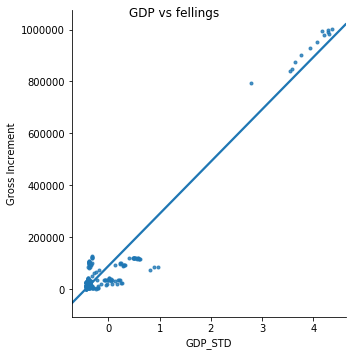

In [101]:
sns.lmplot(x='GDP_STD',y='Gross Increment', ci= None, data=df, markers='.')
plt.gcf().suptitle('GDP vs fellings ')

Text(0.5, 0.98, 'GDP vs fellings ')

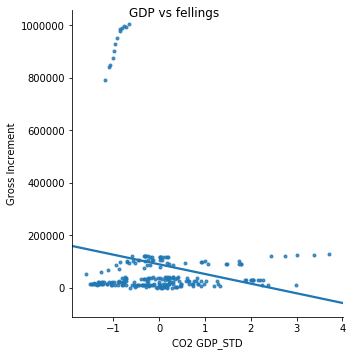

In [102]:
sns.lmplot(x='CO2 GDP_STD',y='Gross Increment', ci= None, data=df, markers='.')
plt.gcf().suptitle('GDP vs fellings ')

Text(0.5, 0.98, 'GDP vs fellings ')

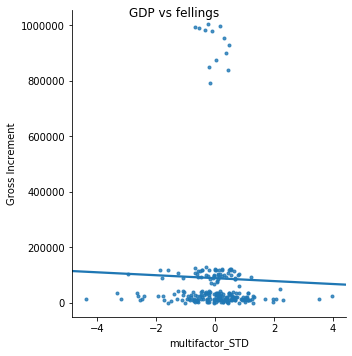

In [103]:
sns.lmplot(x='multifactor_STD',y='Gross Increment', ci= None, data=df, markers='.')
plt.gcf().suptitle('GDP vs fellings ')

In [104]:
df['Gross Increment'].describe()

count    2.360000e+02
mean     8.941007e+04
std      2.074028e+05
min      3.700000e+01
25%      1.294622e+04
50%      2.577000e+04
75%      9.028166e+04
max      1.003638e+06
Name: Gross Increment, dtype: float64

In [105]:
test.loc[test.Value>500000]

,Country,YEA,Unit_x,GDP,Subject,Unit_y,CO2 GDP,Variable_x,Unit_x,multifactor,...,COU,Year,Unit Code,Unit_y,PowerCode Code,Reference Period Code,Reference Period,Value,Flag Codes,Flags
182,United States,1995,US Dollar,1.021686e+07,Gross Domestic Product (GDP); millions,Number,2.013613,"Production-based CO2 productivity, GDP per uni...",Percentage points,1.132900,...,USA,1995,M3,Cubic metres,3,NaN,NaN,792788.0,NaN,NaN
183,United States,2000,US Dollar,1.262027e+07,Gross Domestic Product (GDP); millions,Number,2.202538,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.672647,...,USA,2000,M3,Cubic metres,3,NaN,NaN,839530.0,NaN,NaN
184,United States,2001,US Dollar,1.274626e+07,Gross Domestic Product (GDP); millions,Number,2.235336,"Production-based CO2 productivity, GDP per uni...",Percentage points,1.070859,...,USA,2001,M3,Cubic metres,3,NaN,NaN,849659.0,NaN,NaN
185,United States,2002,US Dollar,1.296826e+07,Gross Domestic Product (GDP); millions,Number,2.338529,"Production-based CO2 productivity, GDP per uni...",Percentage points,1.659841,...,USA,2002,M3,Cubic metres,3,NaN,NaN,875596.0,NaN,NaN
186,United States,2003,US Dollar,1.333931e+07,Gross Domestic Product (GDP); millions,Number,2.377456,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.475850,...,USA,2003,M3,Cubic metres,3,NaN,NaN,901533.0,NaN,NaN
187,United States,2004,US Dollar,1.384606e+07,Gross Domestic Product (GDP); millions,Number,2.433925,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.796275,...,USA,2004,M3,Cubic metres,3,NaN,NaN,927470.0,NaN,NaN
188,United States,2005,US Dollar,1.433250e+07,Gross Domestic Product (GDP); millions,Number,2.513054,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.346243,...,USA,2005,M3,Cubic metres,3,NaN,NaN,953407.0,NaN,NaN
189,United States,2006,US Dollar,1.474169e+07,Gross Domestic Product (GDP); millions,Number,2.631293,"Production-based CO2 productivity, GDP per uni...",Percentage points,1.350672,...,USA,2006,M3,Cubic metres,3,NaN,NaN,979344.0,NaN,NaN
190,United States,2007,US Dollar,1.501827e+07,Gross Domestic Product (GDP); millions,Number,2.640939,"Production-based CO2 productivity, GDP per uni...",Percentage points,0.711365,...,USA,2007,M3,Cubic metres,3,NaN,NaN,984203.0,NaN,NaN
191,United States,2008,US Dollar,1.499776e+07,Gross Domestic Product (GDP); millions,Number,2.720675,"Production-based CO2 productivity, GDP per uni...",Percentage points,0.255427,...,USA,2008,M3,Cubic metres,3,NaN,NaN,989062.0,NaN,NaN


# Top values are from the U.S.A

In [106]:
regr = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
regr.fit(X_train, y_train)
y_train_predicted = regr.predict(X_train)

In [107]:
y_pred = regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [201774.26095515  -2907.88641314  -2931.81559765]
Mean squared error: 3542755243.05
Coefficient of determination: 0.93


In [108]:
print ("R-squared:" ,regr.score(X, y))

R-squared: 0.9378494018735809


In [109]:
print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(y_train, y_train_predicted))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print("MAE:",metrics.mean_absolute_error(y_train, y_train_predicted))

------ TRAIN DATA ------
MSE: 2283205614.701259
RMSE: 47782.90086109527
MAE: 32885.06975476997


In [110]:
from sklearn import metrics
print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))


------ TEST DATA ------
MSE: 3542755243.045003
RMSE: 59521.04873945857
MAE: 42165.99125308579


In [111]:
fitted_Gross = regr.predict(X) # returns ndarray
df['FittedGross']=pd.Series(fitted_Gross)
res=df['Gross Increment']-df['FittedGross']
df['Res']=pd.Series(res)


In [112]:
df.head(20)

,GDP_STD,CO2 GDP_STD,multifactor_STD,Gross Increment,FittedGross,Res
0,-0.339761,0.126240,0.099483,30622.000,21289.580989,9332.419011
1,-0.326374,-0.503894,0.052567,5289.000,25960.474976,-20671.474976
2,-0.315339,-0.219582,-0.028695,5289.000,27598.595370,-22309.595370
3,-0.305928,0.014251,-0.191483,4951.334,29294.902329,-24343.568329
4,-0.303120,0.357445,-0.589473,4601.401,30030.207896,-25428.806896
5,-0.382402,-1.431076,0.586682,19839.000,15785.847525,4053.152475
6,-0.376753,-1.335861,0.626419,21944.000,16532.179766,5411.820234
7,-0.374805,-1.306699,0.748725,22277.000,16481.857101,5795.142899
8,-0.373666,-1.256108,-0.214900,22332.000,19389.709929,2942.290071
9,-0.371142,-1.255557,0.323188,22356.000,18319.840798,4036.159202
